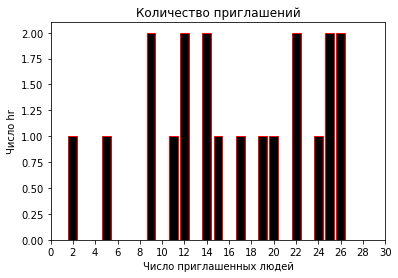

In [41]:
# Сколько hr'ы в нашей команде пригласили людей
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

invited_people = [np.random.randint(0, 30) for i in range(20)] #Список, сколько людей пригласил каждый hr

people_counter = Counter(invited_people)
xs = [num_people for num_people in people_counter]
ys = [people_counter[num_people] for num_people in people_counter]
plt.bar(xs, ys, color='black', edgecolor='red')
plt.xticks([2 * i for i in range(16)])
plt.xlabel('Число приглашенных людей')
plt.ylabel('Число hr')
plt.title('Количество приглашений')
plt.show()

In [4]:
#Число точек данных
num_points = len(invited_people)
print('Кол-во точек: ', num_points)

Кол-во точек:  20


In [5]:
#Наибольшие и наименьшие значения
max_value = max(invited_people)
min_value = min(invited_people)
print('Наибольшее число приглашенных людей: ', max_value)
print('Наименьшее число приглашенных людей: ', min_value)

Наибольшее число приглашенных людей:  29
Наименьшее число приглашенных людей:  0


In [6]:
sorted_values = sorted(list(set(invited_people))) # избавляемся от повторяющихся значений
print(f'Второй минимум: {sorted_values[1]}')
print(f'Второй максимум: {sorted_values[-2]}')

Второй минимум: 3
Второй максимум: 27


In [7]:
#Среднее значение
def calc_mean(l: list[float]) -> float:
    return sum(l)/len(l)

print(f'Среднее кол-во приглашенных людей: {calc_mean(invited_people)}')

Среднее кол-во приглашенных людей: 14.85


In [8]:
#Медианное значение

def median(l: list[float]) -> float:
    l = sorted(l)
    if len(l) % 2 == 0:          # Для списков четным числом вхождений
        a = l[len(l) // 2]
        b = l[(len(l) // 2) - 1]
        return (a + b) / 2       # Медианой является половинчатая сумма двух пограничных в половинках элементов
    else:                        # Для списков с нечетным числом вхождений
        return l[len(l) // 2]    # Медианой является средний элемент
    
print(median([9, 2, 5, 7, 1]))

5


In [9]:
median = median(sorted(invited_people))
print(f'Медианное число приглашений: {median}')

Медианное число приглашений: 14.0


In [10]:
#Квантиль
def quantile(x: list[float], p: float) -> float:
    """Возвращает значение p-го процентиля в x"""
    p_index = int(p * len(x)) # Преобразает % в индекс списка
    return sorted(x)[p_index-1]

print(quantile(invited_people, 0.10))
print(quantile(invited_people, 0.25), 'Нижний квантиль')
print(quantile(invited_people, 0.75), 'Верхний квантиль')
print(quantile(invited_people, 0.90))

0
4 Нижний квантиль
24 Верхний квантиль
27


In [11]:
#Мода

In [12]:
def mode(x: list[float]) -> list[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    #print(counts)
    return [x_i for x_i, count in counts.items() if count == max_count]


mode(invited_people)

[27, 0, 14]

In [13]:
# Вариация

In [14]:
# Размах

In [15]:
def data_range (x: list[float]) -> float:
    return max(x) - min(x)

print(data_range(invited_people))

29


In [16]:
#Дисперсия

In [46]:
def disp_mean(xs: list[float]) -> list[float]:
    """От каждого элемента списка вычесть среднее этого же списка"""
    x_bar = calc_mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: list[float]) -> float:
    """Дисперсия"""
    assert len(xs) >= 2, 'В списке должно быть более двух элементов'
    n = len(xs)
    deviations = disp_mean(xs)
    return sum([deviation**2 for deviation in deviations]) / (n - 1)    

In [18]:
variance(invited_people)

108.02894736842109

In [19]:
#Среднеквадратическое отклонение

In [48]:
import math

def standart_deviation(xs: list[float]) -> float:
    """Стандартное отклонение - корень из дисперсии"""
    return math.sqrt(variance(xs))

standart_deviation(invited_people)

7.258207695248767

In [21]:
#Интерквантильный размах
#Разность между значением, соответствующим 75% и 25% данных

In [22]:
def inter_quant(xs: list[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

print(inter_quant(invited_people))

20


In [44]:
#Ковариация

#В отличие от дисперсии, которая измеряет отклонение одной-единственной переменной от ее среднего,
#ковариация измеряет отклонение двух переменных в тандеме от своих средних.

#invited_people = [2, 27, 15,  2, 17, 28, 24,  3, 18, 25,  8, 16, 26,  5, 19, 14, 18, 21, 21, 23]
work_time = [3, 8, 5, 1, 4, 7, 7, 2, 5, 6, 4, 5, 6, 3, 5, 4, 5, 5, 4, 5]

def dot(v: list[float], w: list[float]) -> float:
    """Вычисление sum(v_i + w_i)"""
    assert len(v) == len(w), 'Должна быть одинаковая длина'
    return sum([v_i * w_i for v_i, w_i in zip(v, w)])

def covariance(xs: list[float], ys: list[float]) -> float:
    assert len(xs) == len(ys), 'Должна быть одинаковая длина'
    return dot(disp_mean(xs), disp_mean(ys)) / (len(xs) - 1)
print(invited_people)
print(work_time)
print(covariance(invited_people, work_time))

print(f'Среднее invited people {calc_mean(invited_people)}')
print(f'Среднее work time {calc_mean(work_time)}')

[24, 9, 20, 14, 5, 26, 22, 15, 14, 12, 17, 19, 25, 12, 11, 9, 25, 26, 22, 2]
[3, 8, 5, 1, 4, 7, 7, 2, 5, 6, 4, 5, 6, 3, 5, 4, 5, 5, 4, 5]
1.7210526315789476
Среднее invited people 16.45
Среднее work time 4.7


In [49]:
# Корреляция

def correlation(xs: list[float], ys: list[float]) -> float:
    """Измеряет связь между двумя выборками. Кофэффициент в диапазоне [-1, 1]"""
    stdev_x = standart_deviation(xs)
    stdev_y = standart_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0 #Если вариации нет, то корреляция равна
    
print(correlation(invited_people, work_time))   

0.1403918566236729


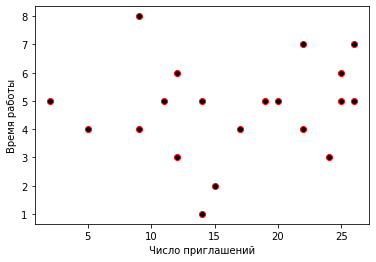

In [50]:
plt.scatter(invited_people, work_time, color='black', edgecolor='red')
plt.xlabel('Число приглашений')
plt.ylabel('Время работы')
plt.show()